## Intro to Probability Theory

**Probability** is a measure of the likelihood that an event will occur. It is quantified as a number between [0, 1], where:
- 0 indicates there is no way the event will occur
- 1 indicates the event will certainly happen

We use proability to help us in all sorts of fields from medicine, business, and modeling to see what we most believe will happen in a givens scenario.

### Sample Space, Events, and Outcomes:
- **Sample Space** (denoted 𝑆) is the set of all possible outcomes of an experiment.
- The **event** (denoted 𝐸) is a subset of the sample space. It represents one or more outcomes.
- An **outcome** is a single result from a sample space.

So, how is this typically written? Well, let's look at a basic example of tossing a coin:

Sample space:

$S$ = {*Heads*,*Tails*}

Event:

$E$ ={*Heads*}

**Let's simulate a simple experiment: tossing a fair coin 100 times!**


Heads: 46, Tails: 54


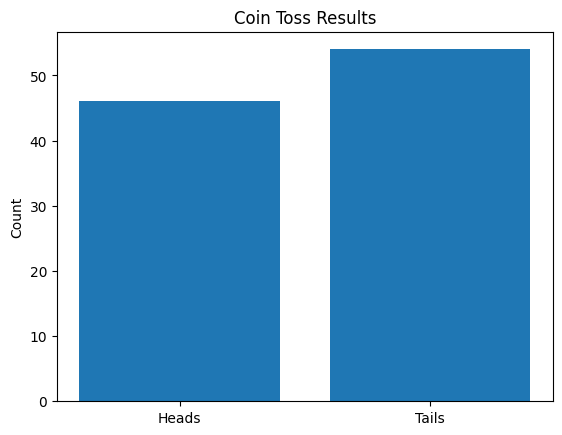

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

# Define sample space
sample_space = ['Heads', 'Tails']

# Simulate 100 tosses
n_tosses = 100

# Randomly assign heads or tails to coin toss
tosses = np.random.choice(sample_space, size=n_tosses)

# Count occurrences
heads_count = np.sum(tosses == 'Heads')
tails_count = np.sum(tosses == 'Tails')

# Print results
print(f"Heads: {heads_count}, Tails: {tails_count}")

# Visualize the results
labels = ['Heads', 'Tails']
counts = [heads_count, tails_count]

# Plot experiment data
plt.bar(labels, counts)
plt.title('Coin Toss Results')
plt.ylabel('Count')
plt.show();

# You can re-run to get different results!

## Basic Rules of Probability


### Addition Rule:
For two mutually exclusive events $( A )$ and $( B )$, the probability that either $( A )$ or $( B )$ occurs is given by:

$$[P(A \cup B) = P(A) + P(B)]$$
Where $( P(A \cup B) )$ is the probability of either event happening.

When you hear the term mutually exclusive, think that the two events can't both happen.

### Multiplication Rule:
For two independent events $A$ and $B$, the probability of both events happening is the product of their probabilities:
$$P(A \cap B) = P(A) \cdot P(B)$$

Where $P(A \cap B)$ is the probability of both events occurring.

Independent events are those that, the likelihood of either happening is not affected by what happens with the other.

### Complement Rule:
The probability that an event $A$ does not occur is given by the complement of the event:

$$P(A^c) = 1 - P(A)$$

When you hear complement, just think the opposite of whatever the event you're currently looking at is.

**Let's continue using our coin, but we'll also add in a dice!**



In [ ]:
# Simple experiment with a die roll and a coin toss

# Sample spaces
die_sample_space = np.arange(1, 7) # [1,6] <- dice

coin_sample_space = ['Heads', 'Tails'] # H/T <- coin

# Roll a die and toss a coin 100 times
n_trials = 100

# Assign outcomes from sample space randomly
die_rolls = np.random.choice(die_sample_space, size=n_trials)
coin_tosses = np.random.choice(coin_sample_space, size=n_trials)

# Define event: Die roll = 6 and Coin toss = Heads
event_die_6 = (die_rolls == 6)
event_heads = (coin_tosses == 'Heads')

# Probability of both events happening (Multiplication Rule)
both_events = np.sum(event_die_6 & event_heads) / n_trials

print(f"Probability of rolling a 6 and getting Heads: {round(both_events,2)*100}%")

# Define event: Rolling a 4 or getting tails
event_4 = (die_rolls == 4)
event_tails = (coin_tosses == 'Tails')

# Probability of either event happening (Addition Rule)
either_event = np.sum((event_4 | event_tails)) / n_trials

print(f"Probability of rolling a 4 or getting Tails: {round(either_event,2)*100}%")

Probability of rolling a 6 and getting Heads: 17.0%
Probability of rolling a 4 or getting Tails: 48.0%


## 3. **Conditional Probability**

The probability of an event occurring given that another event has already occurred. It is denoted as $P(A|B)$ and calculated using the formula:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Where:
- $P(A|B)$ is the probability of $A$ occurring given $B$ has occurred.
- $P(A \cap B)$ is the probability of both $A$ and $B$ occurring.
- $P(B)$ is the probability of $B$ occurring.

## 4. **Bayes' Theorem**

Bayes' Theorem relates conditional probabilities and is given by:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Where:
- $P(A|B)$ is the probability of $A$ given $B$.
- $P(B|A)$ is the probability of $B$ given $A$.
- $P(A)$ and $P(B)$ are the probabilities of $A$ and $B$ independently.

### Example: Diagnostic Test
Consider a medical test where:
- $P(\text{Positive Test}|\text{Disease})$ is the probability of testing positive given a disease.
- $P(\text{Disease})$ is the overall probability of having the disease.

Bayes' Theorem can be used to find the probability of having the disease given a positive test result. Let's take a look at that example below:

$P(\text{Positive Test}|\text{Disease})$ = 95%

$P(\text{Disease})$ = 1%

Given the probabilities we are given above, we can calculate a couple of others:

$P(\text{No Disease})$ = 1 - $P(\text{Disease})$ = 0.99

$P(\text{Positive Test}|\text{No Disease})$ = 1 - $P(\text{Positive Test}|\text{Disease})$ = 0.05

**What's the probability of having the disease, given that you have a positive test result?**

In [ ]:
# Known probabilities
P_disease = 0.01  # Probability of having the disease
P_positive_given_disease = 0.95  # Sensitivity (true positive rate)
P_positive_given_no_disease = 0.05  # False positive rate
P_no_disease = 1 - P_disease  # Probability of not having the disease

# Apply Bayes' Theorem
P_positive = ((P_positive_given_disease * P_disease)
              + (P_positive_given_no_disease * P_no_disease))
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

print(f"Probability of having the disease given a positive test: {round(P_disease_given_positive,2)*100}%")

Probability of having the disease given a positive test: 16.0%


## 5. **Independence**

### Definition:
Two events $A$ and $B$ are **independent** if the occurrence of one does not affect the occurrence of the other. Formally, $A$ and $B$ are independent if:
$$
P(A \cap B) = P(A) \cdot P(B)
$$

**Let's see how we can check if two events are independent!**

In [ ]:
# Probability of rolling a 6
P_six = np.mean(die_rolls == 6)

# Probability of getting Heads
P_heads = np.mean(coin_tosses == 'Heads')

# Probability of rolling a 6 and getting Heads
P_six_and_heads = np.mean((die_rolls == 6) & (coin_tosses == 'Heads'))

# Check for independence: P(A ∩ B) should equal P(A) * P(B)
independent = np.isclose(P_six_and_heads, P_six * P_heads)

print(f"Are the events independent? {independent}")

Are the events independent? False


## Probability Distributions

### Uniform Distribution:
A **uniform distribution** is one in which all outcomes are equally likely. For a discrete uniform distribution with $n$ outcomes, the probability of any specific outcome is:
$$
P(x) = \frac{1}{n}
$$


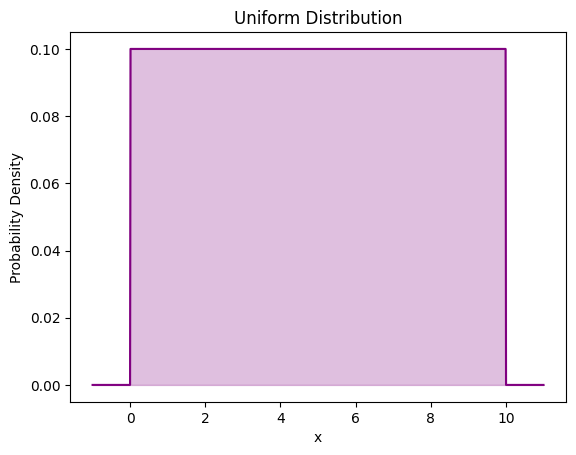

In [ ]:
# Package import
from scipy.stats import uniform

# Parameters for the uniform distribution

a = 0  # Lower bound of the uniform distribution
b = 10  # Upper bound of the uniform distribution

# Generate values for the x-axis
# 1000 points between a - 1 and b + 1 for smooth line
x = np.linspace(a - 1, b + 1, 1000)

# Get the PDF (probability density function) values for the uniform distribution
# loc = lower bound; scale = diff b/w upper and lower bound of distribution
pdf_values = uniform.pdf(x, loc=a, scale=b-a)

# Plot uniform distribution
plt.plot(x, pdf_values, color='purple')
plt.fill_between(x, pdf_values, color='purple', alpha=0.25)
plt.title('Uniform Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show();

### Binomial Distribution:
The **binomial distribution** describes the number of successes in $n$ independent Bernoulli trials. The probability of getting exactly $k$ successes in $n$ trials is given by the formula:
$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$
Where $p$ is the probability of success in a single trial.

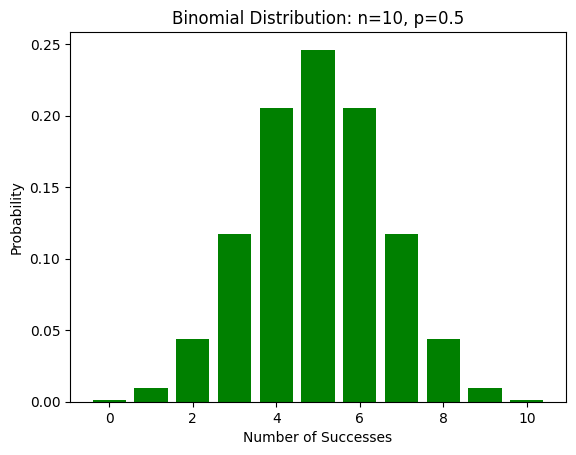

In [ ]:
# Package imports
from scipy.stats import binom
import matplotlib.pyplot as plt

# Parameters for the binomial distribution
n_trials = 10  # Number of trials
p_success = 0.5  # Probability of success in each trial

# Create the binomial distribution
x = np.arange(0, n_trials + 1)
binomial_pmf = binom.pmf(x, n_trials, p_success)

# Plot the distribution
plt.bar(x, binomial_pmf, color='green')
plt.title('Binomial Distribution: n=10, p=0.5')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

### Normal Distribution:
The **normal distribution** is a continuous distribution defined by its mean $\mu$ and standard deviation $\sigma$.

The probability density function (PDF) is given by:
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

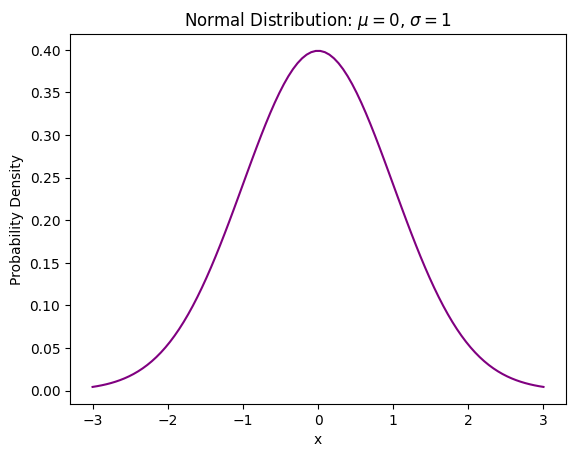

In [ ]:
# Package import
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate data points
x = np.linspace(-3, 3, 100)
normal_pdf = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.plot(x, normal_pdf, color='purple')
plt.title('Normal Distribution: $\mu=0$, $\sigma=1$')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show();

## Extra Word Problems You Can Study!

### Binomial Word Problem

#### Problem:
A basketball player has a free throw success rate of 70\% (i.e., they make 70\% of their free throws). If the player takes 10 free throws in a game, what is the probability that the player makes exactly 7 of them?


In [ ]:
# Package import
from scipy.stats import binom

# Parameters for the binomial distribution

n = 10  # Number of trials (free throws)
p = 0.70  # Probability of success (making a free throw)
k = 7  # Number of successes (free throws made)

# Calculate the probability of exactly 7 successes
# PMF - probability mass function; probability at a specific point / density
probability = binom.pmf(k, n, p)

print(f"The probability that the player makes exactly 7 free throws is: {100*probability:.4f}%")

The probability that the player makes exactly 7 free throws is: 26.6828%


### Normal Distribution Word Problem

#### Problem:
The heights of adult men in a city are normally distributed with a mean of 70 inches and a standard deviation of 3 inches. What is the probability that a randomly selected man is taller than 74 inches?

In [ ]:
# Package import
from scipy.stats import norm

# Parameters for the normal distribution

mu = 70  # Mean height in inches
sigma = 3  # Standard deviation in inches
x = 74  # The height we're interested in (greater than 74 inches)

# Calculate the z-score
z_score = (x - mu) / sigma

# Find the probability that height is greater than 74 inches
# When you hear probability greater than a certain value, think CDF!
# You can do 1 - CDF to get cumulative probs after a certain value.
probability = 1 - norm.cdf(z_score)

# Or you can calculate prob w/o converting to z-score, if you prefer
probability = 1 - norm.cdf(x, loc=mu, scale=sigma)

print(f"The probability that a man is taller than 74 inches is: {100*probability:.4f}%")

The probability that a man is taller than 74 inches is: 9.1211%
